In [27]:
import re
from google.colab import files

#Uploading the downloaded log file
uploaded = files.upload()

#Readding the file
with open("access.log.txt", "r") as file:
    logs = file.readlines()

#Preparing storage lists to store the extracted data
ip_list = []
method_list = []
url_list = []
status_list = []

#Looping through each line and applying regex
for line in logs:
    #IP address
    ip = re.search(r'^\d+\.\d+\.\d+\.\d+', line)

    #HTTP method and URL
    method_url = re.search(r'"(GET|POST|PUT|DELETE|HEAD|OPTIONS|PATCH) (.*?) HTTP', line)

    #status code
    status = re.search(r'" (\d{3}) ', line)

    #Appending extracted values to lists
    ip_list.append(ip.group() if ip else None)
    method_list.append(method_url.group(1) if method_url else None)
    url_list.append(method_url.group(2) if method_url else None)
    status_list.append(status.group(1) if status else None)

# A preview of the first few extracted entries
for i in range(5):
    print(f"IP: {ip_list[i]}, Method: {method_list[i]}, URL: {url_list[i]}, Status: {status_list[i]}")


Saving access.log.txt to access.log.txt
IP: 83.149.9.216, Method: GET, URL: /presentations/logstash-monitorama-2013/images/kibana-search.png, Status: 200
IP: 83.149.9.216, Method: GET, URL: /presentations/logstash-monitorama-2013/images/kibana-dashboard3.png, Status: 200
IP: 83.149.9.216, Method: GET, URL: /presentations/logstash-monitorama-2013/plugin/highlight/highlight.js, Status: 200
IP: 83.149.9.216, Method: GET, URL: /presentations/logstash-monitorama-2013/plugin/zoom-js/zoom.js, Status: 200
IP: 83.149.9.216, Method: GET, URL: /presentations/logstash-monitorama-2013/plugin/notes/notes.js, Status: 200


In [31]:
import pandas as pd

#Structuring the data into a dataframe
data = {
    'IP Address': ip_list,
    'HTTP Method': method_list,
    'URL': url_list,
    'Status Code': status_list
}

df = pd.DataFrame(data)

#displaying the initial dataframe info before cleaning
print("Initial DataFrame info:")
print(df.info())
print(f"Initial shape: {df.shape}\n")

#Cleaning the dataframe by dropping rows with missing values in the columns
df_clean = df.dropna(subset=['HTTP Method', 'URL', 'Status Code'])

#Displaying cleaned the dataframe info
print("Cleaned DataFrame info:")
print(df_clean.info())
print(f"Cleaned shape: {df_clean.shape}\n")

#A preview of the cleaned data
print(df_clean.head())

#saving the dataframe into a CSV file
df_clean.to_csv("cleaned_log_data.csv", index=False)
from google.colab import files
files.download("cleaned_log_data.csv")


Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IP Address   10000 non-null  object
 1   HTTP Method  9986 non-null   object
 2   URL          9986 non-null   object
 3   Status Code  9986 non-null   object
dtypes: object(4)
memory usage: 312.6+ KB
None
Initial shape: (10000, 4)

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IP Address   9986 non-null   object
 1   HTTP Method  9986 non-null   object
 2   URL          9986 non-null   object
 3   Status Code  9986 non-null   object
dtypes: object(4)
memory usage: 390.1+ KB
None
Cleaned shape: (9986, 4)

     IP Address HTTP Method  \
0  83.149.9.216         GET   
1  83.149.9.216         GET   
2  83.149.9.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
#Finding the most frequent IP addresses
top_ips = df['IP Address'].value_counts().head(5)
print("Top 5 IP addresses:\n", top_ips)

#Finding the most requested URLs
top_urls = df['URL'].value_counts().head(5)
print("\nTop 5 requested URLs:\n", top_urls)

#Finding the status code distribution
status_counts = df['Status Code'].value_counts()
print("\nStatus code distribution:\n", status_counts)

#Finding the most common HTTP methods
method_counts = df['HTTP Method'].value_counts()
print("\nHTTP method distribution:\n", method_counts)



Top 5 IP addresses:
 IP Address
66.249.73.135     482
46.105.14.53      364
130.237.218.86    357
75.97.9.59        273
50.16.19.13       113
Name: count, dtype: int64

Top 5 requested URLs:
 URL
/favicon.ico                   807
/style2.css                    546
/reset.css                     537
/images/jordan-80.png          532
/images/web/2009/banner.png    516
Name: count, dtype: int64

Status code distribution:
 Status Code
200    9113
304     445
404     212
301     164
206      45
500       3
403       2
416       2
Name: count, dtype: int64

HTTP method distribution:
 HTTP Method
GET        9938
HEAD         42
POST          5
OPTIONS       1
Name: count, dtype: int64


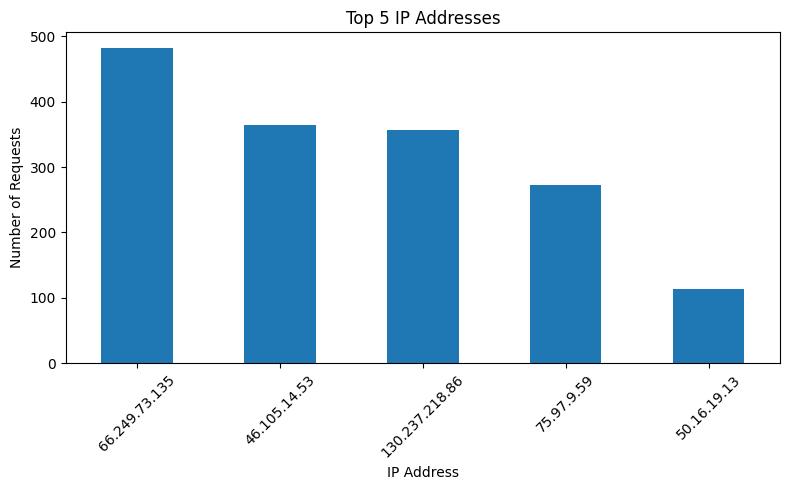

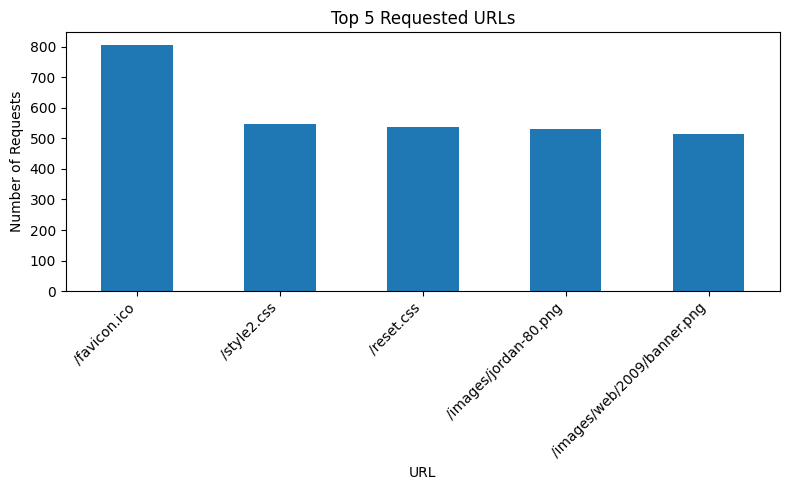

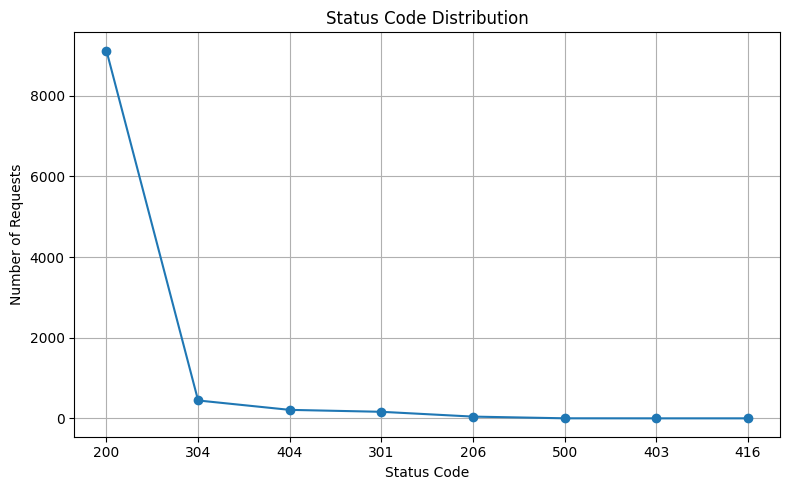

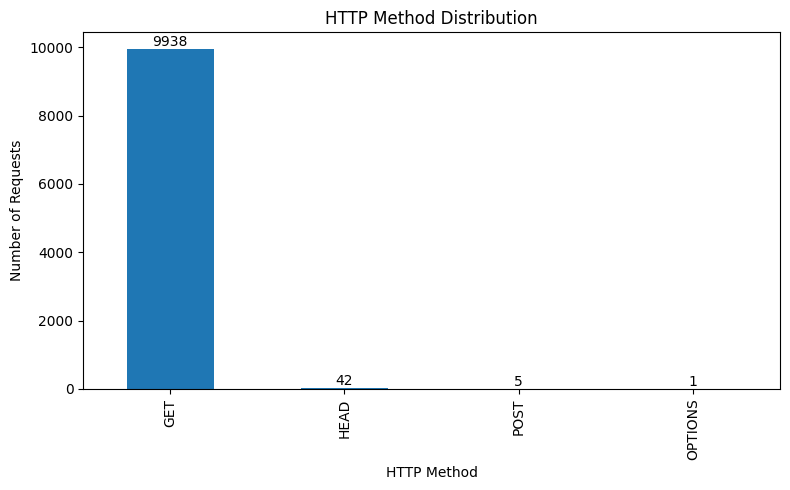

In [30]:
import matplotlib.pyplot as plt

#Plotting the top 5 IP addresses
top_ips = df_clean['IP Address'].value_counts().head(5)
plt.figure(figsize=(8,5))
top_ips.plot(kind='bar')
plt.title('Top 5 IP Addresses')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_ips_bar.png")
plt.show()

#Plotting the top 5 requested URLs
top_urls = df_clean['URL'].value_counts().head(5)
plt.figure(figsize=(8,5))
top_urls.plot(kind='bar')
plt.title('Top 5 Requested URLs')
plt.xlabel('URL')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_urls_bar.png")
plt.show()

#Plotting the status code on a line chart
plt.figure(figsize=(8,5))
plt.plot(status_counts.index, status_counts.values, marker='o', linestyle='-')
plt.title('Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.savefig("status_codes_line.png")
plt.show()

#Plotting the HTTP methods as a bar chart
plt.figure(figsize=(8,5))
ax = method_counts.plot(kind='bar')
plt.title('HTTP Method Distribution')
plt.xlabel('HTTP Method')
plt.ylabel('Number of Requests')

#Adding count labels on bars to make it easier to read
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig("http_methods_bar.png")
plt.show()